## Predict survival on the **Titanic** using Python.

In [1]:
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('datasets/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Analysis

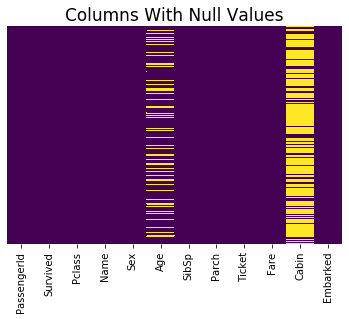

In [4]:
plt.title('Columns With Null Values', fontsize = 17)
sns.heatmap(train.isnull(), yticklabels= False, cbar = False, cmap ='viridis')

Yellow part indicates the Null value

In [5]:
sns.set_style('whitegrid')

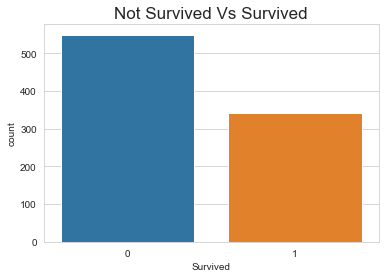

In [6]:

plt.title('Not Survived Vs Survived', fontsize = 17)
ax = sns.countplot(x = 'Survived', data = train)


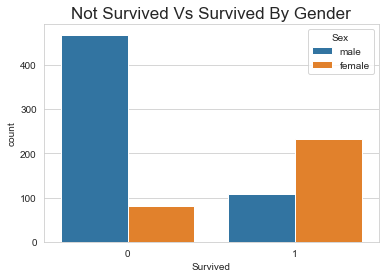

In [7]:

plt.title('Not Survived Vs Survived By Gender', fontsize = 17)
ax = sns.countplot(x = 'Survived', data = train, hue = 'Sex')


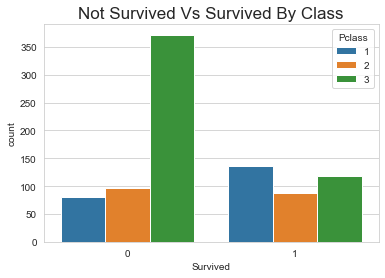

In [8]:

plt.title('Not Survived Vs Survived By Class', fontsize = 17)
ax = sns.countplot(x = 'Survived', data = train, hue = 'Pclass')


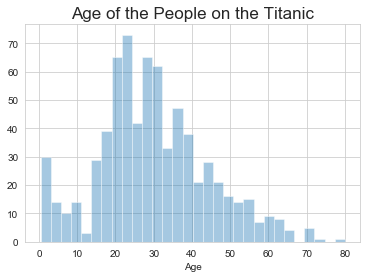

In [9]:
plt.title('Age of the People on the Titanic', fontsize = 17)
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

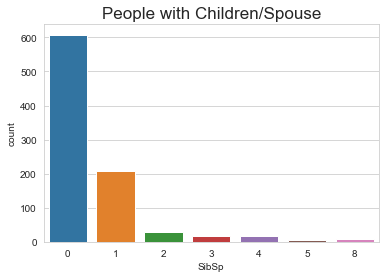

In [10]:
plt.title('People with Children/Spouse', fontsize = 17)
sns.countplot(x = 'SibSp', data = train)

In [11]:
import cufflinks as cf


In [12]:
cf.go_offline()

In [13]:
train['Fare'].iplot(kind = 'hist',bins = 30)

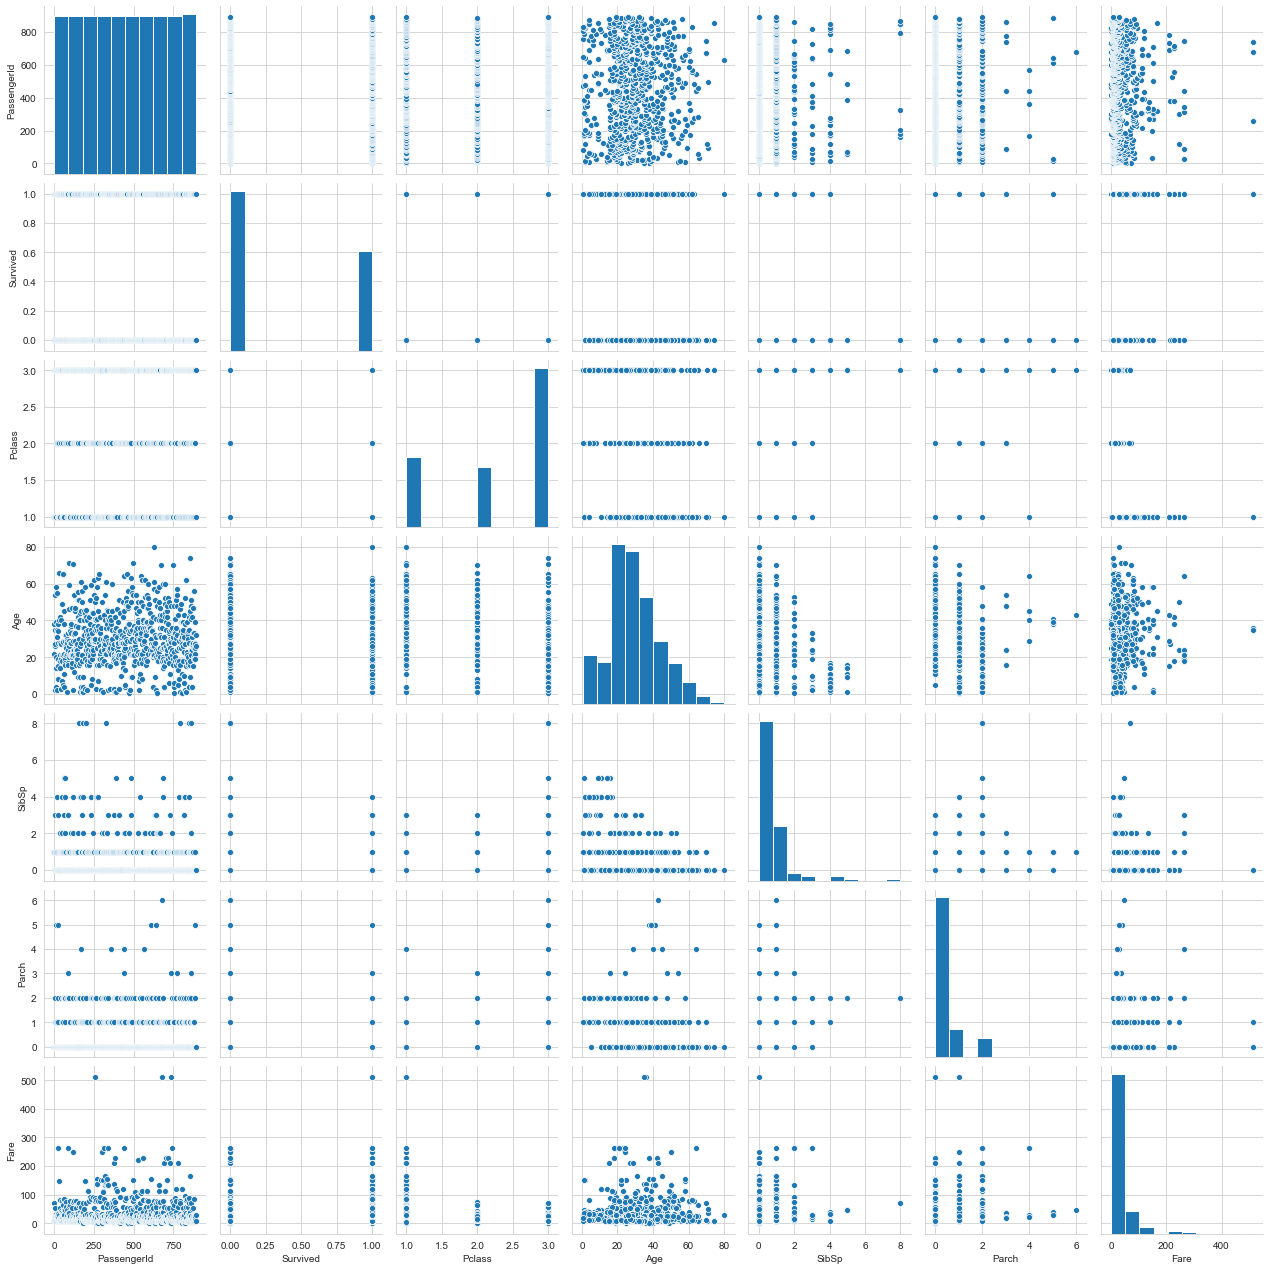

In [14]:
sns.pairplot(train)

### Filling the missing values of age

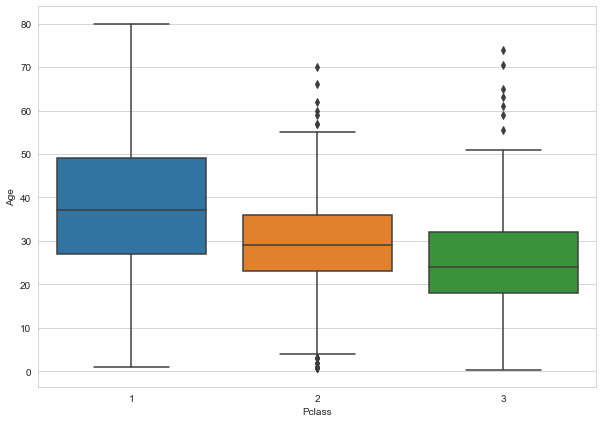

In [15]:
plt.figure(figsize = (10, 7))
sns.boxplot( x='Pclass', y = 'Age', data = train)

Passengers in the first class and second class tends to bit older than passengers third class.

In [16]:
#Average Age By Class
Avg = train.groupby(train['Pclass'])['Age'].mean()

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return (int(Avg[1]))

        elif Pclass == 2:
            return (int(Avg[2]))

        else:
            return (int(Avg[3]))

    else:
        return Age

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [18]:
train.drop('Cabin', axis = 1, inplace = True)


In [19]:
train.dropna(inplace = True)

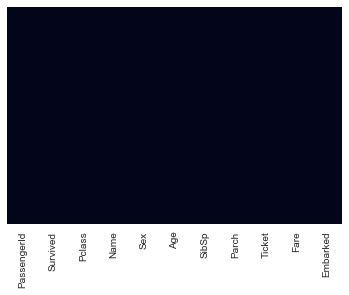

In [20]:
#we have no missing values 
sns.heatmap(train.isnull(), yticklabels=False, cbar = False)

### Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [21]:

embark = pd.get_dummies(train['Embarked'], drop_first= True)

In [22]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [23]:
train = pd.concat([train, sex, embark], axis = 1)

In [24]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [25]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [26]:
train.drop('PassengerId', axis = 1, inplace = True)

In [27]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Building a Logistic Regression model

In [28]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=101)

## Training and Predicting

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()

In [33]:
logmodel.fit(X_train, y_train)

C:\Users\Twinkle\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
prediction = logmodel.predict(X_test)

## Evaluation 

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test, prediction)

array([[148,  15],
       [ 36,  68]], dtype=int64)